# <a href="https://colab.research.google.com/github/AlinaKasiuk/Book-Recommendation-System/blob/main/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratary analisys and data preprocessing

For this example we have chosen a dataset with information about the rooms in Amsterdam ["Amsterdam AirBnb" dataset](https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb) available on Kaggle. 

This Dataset includes details of the total number of bedrooms, bathrooms, guests, latitude, longitude, reviews, if the place is instantly bookable, room_type in the hotel.

####  Install the required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

To print the graphs we use the functions available [here](https://www.kaggle.com/kerneler/starter-amsterdam-airbnb-37b7b3e1-1).

####  Define the functions

Function to print the histograms of the data distribution by columns:

In [17]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (5 * nGraphPerRow, 5 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

Function to print the correlation matrix:

In [3]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

#### Exploring the downloaded archive

Unzip the archive downloaded from Kaggle if you have not done it manualy already. 
<i>Probably you need to change the directory name.</i>

In [4]:
import zipfile

if not os.path.exists('./Datasets/'):
    os.makedirs('./Datasets/')

    # Choose the location of YOUR archive!!!
    local_zip = 'C:\\Users\\Alina\\Downloads\\archive.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./Datasets/')

    zip_ref.close()

Choose the Datasets folder and obsereve which files are saved in it:

In [5]:
print(os.listdir('./Datasets/'))

['amsterdam.json', 'test.csv', 'train.csv', 'y_test.csv', 'y_train.csv']


As we see, the archive contains five files: <i>'amsterdam.json', 'test.csv', 'train.csv', 'y_test.csv', 'y_train.csv'
</i>.

Let's have a look on the file <i>amsterdam.json</i>:

In [34]:
ams = pd.read_json('./Datasets/amsterdam.json')
ams.dataframeName = 'amsterdam.json'
nRow, nCol = ams.shape
print(f'The file amsterdam.json has {nRow} rows and {nCol} columns')

The file amsterdam.json (dataset rating) has 15181 rows and 13 columns


In [10]:
ams.head(5)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f


Let's show the distribution of each variable in the histogram:

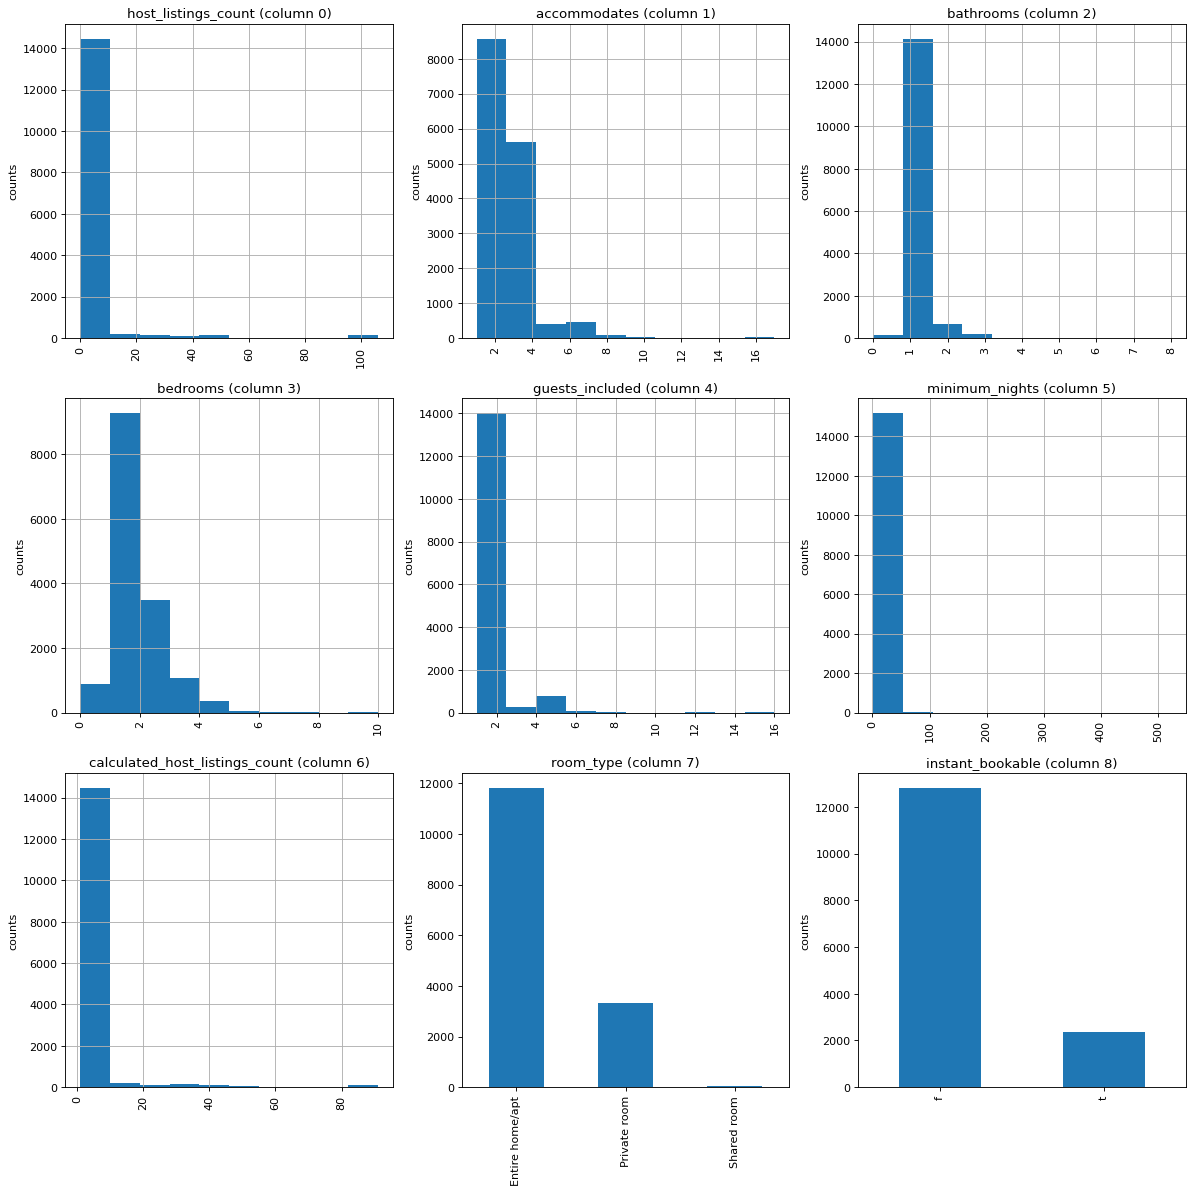

In [23]:
plotPerColumnDistribution(ams, 9, 3)

In [15]:
print(ams.shape)

(15181, 13)


Remove the symbols '$' and ',' from the variable ´price´:

In [24]:
ams['price']=ams['price'].str.replace(',','')
ams['price']=ams['price'].str.replace('$','')

C:\Users\Alina\.conda\envs\Deep Learning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Convert the price to the numeric format:

In [25]:
ams['price']=pd.to_numeric(ams['price'])

So now we have a look on a price distribution histogram.

Text(0.5, 1.0, 'Price')

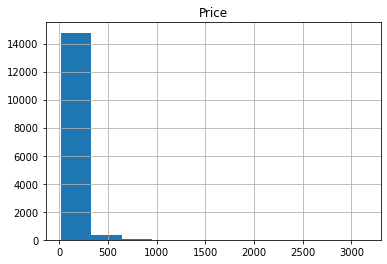

In [26]:
ams['price'].hist()
plt.title(f'Price')

Make a summary of the data we have in the dataframe:

In [28]:
ams.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,134.799223,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,85.751273,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,90.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,118.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,3142.000000,52.426224,5.027689


Varable types in the dataset:

ams.dtypes

Plot the correlation matrix for the variables:

C:\Users\Alina\.conda\envs\Deep Learning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


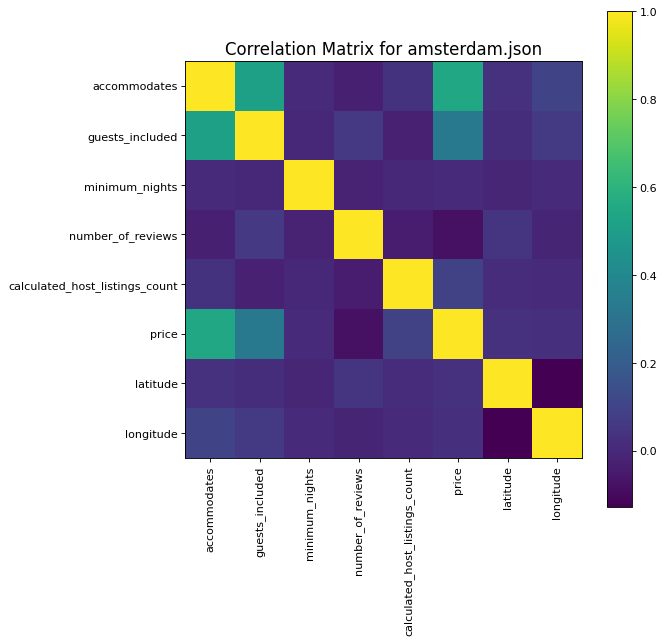

In [32]:
plotCorrelationMatrix(ams, 8)

Here we can clearly see that the price depends more on the number of accommodations than on other variables.

Let's have a look on another files

In [35]:
x_test = pd.read_csv('./Datasets/test.csv', delimiter=',')
x_test.dataframeName = 'test.csv'
nRow, nCol = x_test.shape
print(f'The file test.csv has {nRow} rows and {nCol} columns')

The file test.csv has 4500 rows and 16 columns


In [36]:
x_test.head(5)

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,3,1.0,1.0,1,1,1.0,52.339005,4.944442,5,7,5.410324,1,0,1,0,0
1,2,1.0,1.0,1,1,1.0,52.374981,4.890104,3,9,0.786783,1,0,1,0,0
2,5,2.0,5.0,11,2,15.0,52.401826,4.914041,6,4,2.703668,1,0,1,0,0
3,4,1.0,2.0,1,1,1.0,52.350448,4.798421,2,0,7.561760,1,0,1,0,0
4,2,1.0,1.0,1,1,1.0,52.361044,4.943895,5,3,3.628639,1,0,1,0,0


In [37]:
x_test.dtypes

accommodates                        int64
bathrooms                         float64
bedrooms                          float64
calculated_host_listings_count      int64
guests_included                     int64
host_listings_count               float64
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
d_centre                          float64
instant_bookable_f                  int64
instant_bookable_t                  int64
room_type_Entire home/apt           int64
room_type_Private room              int64
room_type_Shared room               int64
dtype: object

In [41]:
x_train = pd.read_csv('./Datasets/train.csv', delimiter=',')
x_train.dataframeName = 'train.csv'
nRow, nCol = x_train.shape
print(f'The file train.csv has {nRow} rows and {nCol} columns')

The file train.csv has 10498 rows and 16 columns


In [42]:
x_train.head(5)

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,4,2.0,2.0,1,1,1.0,52.358466,4.933843,2,8,3.279483,1,0,1,0,0
1,4,1.0,2.0,1,2,1.0,52.363589,4.983353,3,0,5.951843,1,0,1,0,0
2,2,1.0,1.0,1,1,1.0,52.375209,4.861647,3,8,2.601055,1,0,1,0,0
3,2,1.0,1.0,1,1,1.0,52.387382,4.890457,2,41,1.095138,1,0,0,1,0
4,2,1.0,1.0,1,1,1.0,52.384062,4.889877,3,0,0.844491,1,0,1,0,0


In [43]:
y_test = pd.read_csv('./Datasets/y_test.csv', delimiter=',')
y_test.dataframeName = 'y_test.csv'
nRow, nCol = y_test.shape
print(f'The file y_test.csv has {nRow} rows and {nCol} columns')

The file y_test.csv has 4499 rows and 1 columns


In [44]:
y_test.head(5)

,59.0
0,148.0
1,134.0
2,195.0
3,80.0
4,120.0


In [45]:
y_test.dtypes

59.0    float64
dtype: object

In [46]:
y_train = pd.read_csv('./Datasets/y_train.csv', delimiter=',')
y_train.dataframeName = 'y_train.csv'
nRow, nCol = y_train.shape
print(f'The file y_train.csv has {nRow} rows and {nCol} columns')

The file y_train.csv has 10497 rows and 1 columns


In [47]:
y_train.head(5)

,160.0
0,120.0
1,99.0
2,100.0
3,175.0
4,119.0


## Conclution

For this example we have chosen a free avaible dataset from Kaggle. The downloaded <i>.zip</i> archive contains a <i>.json </i> file and 4 <i>.csv </i> files:
<blockquote> <li><i>amsterdam.json</i></li>
 <li><i>test.csv</i></li>
 <li><i>train.csv</i></li>
 <li><i>y_test.csv</i></li>
 <li><i>y_train.csv</i></li></blockquote>
 viene
The file <i>amsterdam.json</i> contains the entire dataset in the format comfortable to read. Other files provide separated data, well prepared work on the classification challenges. 